# DSCI 552 HW1--> Vertebral Coloumn Dataset

## Name: Ankit Tripathi
## USC ID: 4612676999
## Github Username: AnkitTripathi45

In [1]:
import pandas as pd 
import numpy as np 
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
import warnings
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

###### Loading the Dataset and preprocessing 

In [2]:


data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df= pd.DataFrame(data[0])
df1=df.replace(to_replace=[b'Abnormal',b'Normal'],value=[1,0])

df1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


#### Question 1.b.(i)
Scatterplots of all the independent variables

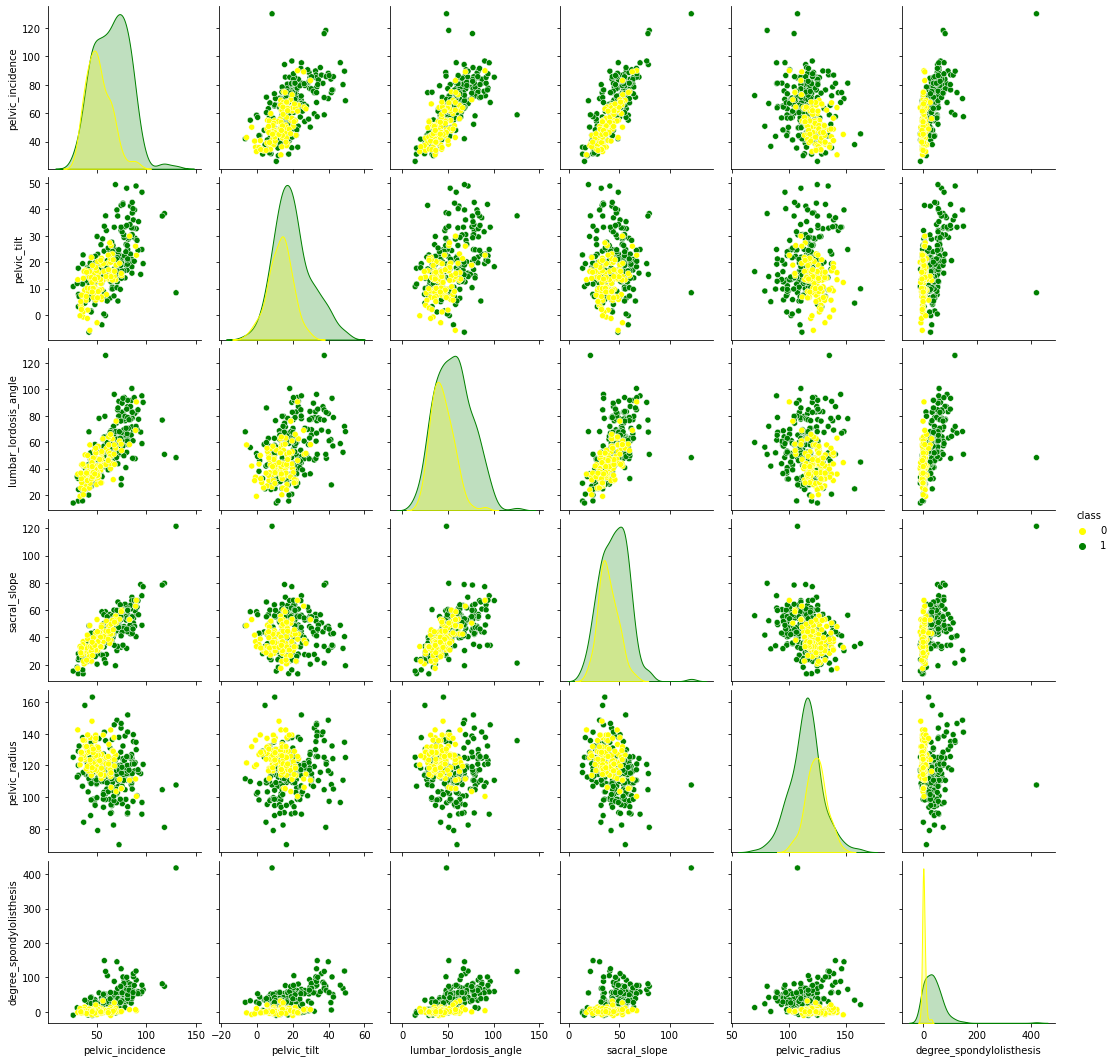

In [3]:
sns.pairplot(df1, hue='class',kind="scatter",palette=['yellow','green'])

#### Question 1.b.(ii)
Boxplots of all the variables with the class distinction

<AxesSubplot:xlabel='class', ylabel='degree_spondylolisthesis'>

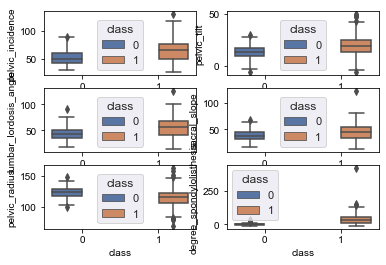

In [4]:
fig,axes=plt.subplots(3,2)
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x=df1['class'],y=df1['pelvic_incidence'],hue=df1['class'],ax=axes[0,0])
sns.boxplot(x=df1['class'],y=df1['pelvic_tilt'],hue=df1['class'],ax=axes[0,1])
sns.boxplot(x=df1['class'],y=df1['lumbar_lordosis_angle'],hue=df1['class'],ax=axes[1,0])
sns.boxplot(x=df1['class'],y=df1['sacral_slope'],hue=df1['class'],ax=axes[1,1])
sns.boxplot(x=df1['class'],y=df1['pelvic_radius'],hue=df1['class'],ax=axes[2,0])
sns.boxplot(x=df1['class'],y=df1['degree_spondylolisthesis'],hue=df1['class'],ax=axes[2,1])

#### Question 1.b.(iii)
Splitting the Training and Testing Dataset

In [5]:
x1=df1[df1['class']==0]
y1=df1[df1['class']==1]
x_train= x1.iloc[:70]
y_train= y1.iloc[:140]
x_test=x1.iloc[70:]
y_test=y1.iloc[140:]

x_train=pd.concat([x_train,y_train])
x_train= x_train.reset_index(drop=True)
x_test=pd.concat([x_test,y_test])
x_test=x_test.reset_index(drop=True)

display(x_train)
display(x_test)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
205,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
206,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
207,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
208,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
1,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
2,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
3,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
4,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
...,...,...,...,...,...,...,...
95,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
96,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
97,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
98,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


### Question 1.c.(i)


In [6]:
#Splitting into train data and test data 

Y_train=x_train.iloc[:,[-1]] # training labels
X_train= x_train.drop(columns=['class']) #training features
X_test= x_test.drop(columns=['class']) #testing features
Y_test=x_test.iloc[:,[-1]] #testing labels

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier= KNeighborsClassifier(n_neighbors=4,p=2)
classifier.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=4)

### Question 1.c.(ii)

<function matplotlib.pyplot.show(close=None, block=None)>

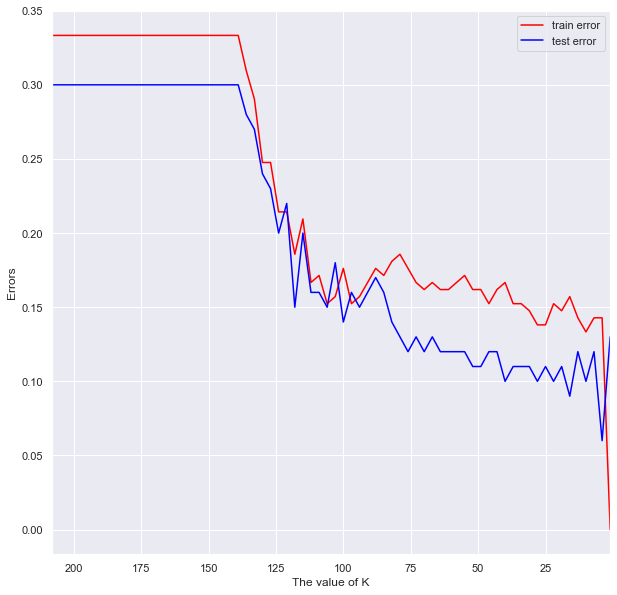

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
k=[]
k1=208
while (k1>0):
    k.append(k1)
    k1-=3
test_error=[]
train_error=[]
for i in k:
    classifier.n_neighbors=i
    classifier.fit(X_train,Y_train)
    train_acc= 1-(classifier.score(X_train,Y_train))
    train_error.append(train_acc)
    
    test_acc=1-classifier.score(X_test,Y_test)
    test_error.append(test_acc)

plt.plot(k,train_error,color='red',label="train error")
plt.plot(k,test_error,color='blue',label="test error")
plt.xlim(max(k),min(k))

plt.xlabel("The value of K")
plt.ylabel("Errors")
plt.legend()


plt.show


The optimum K value is : 6
.......................The classification report is: ...........................
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        30
           1       0.90      1.00      0.95        70

    accuracy                           0.92       100
   macro avg       0.95      0.87      0.90       100
weighted avg       0.93      0.92      0.92       100

.......................The confusion matrix is:...........................
0.07999999999999996


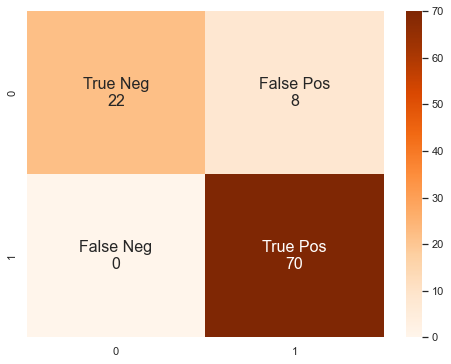

In [22]:
min_val=min(test_error)
opK= test_error.index(min_val)
op_value=k[opK]
print("The optimum K value is :",op_value)
classifier_op= KNeighborsClassifier(n_neighbors=op_value)
classifier_op.fit(X_train,Y_train)
preds_op= classifier_op.predict(X_test)
print(".......................The classification report is: ...........................")
acc=accuracy_score(Y_test,preds_op)
print(classification_report(Y_test,preds_op))
C_M=confusion_matrix(Y_test,preds_op)
print(".......................The confusion matrix is:...........................")
GN = ["True Neg","False Pos","False Neg","True Pos"]
GC = ['{0:0.0f}'.format(value) for value in C_M.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(GN,GC)]
labels = np.asarray(labels).reshape(2,2)
fig, ax=plt.subplots(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
sns.heatmap(C_M, annot=labels, fmt='',cmap='Oranges')



In [10]:
TP= C_M[1, 1]
TN= C_M[0, 0]
FP = C_M[0, 1]
FN = C_M[1, 0]

true_positive_rate = TP / (TP + FN)
true_negative_rate = TN / (TN + FP)
precision_score = metrics.precision_score(Y_test, preds_op)
f1_score = metrics.f1_score(Y_test, preds_op)
print("True Positive Rate:",true_positive_rate)
print("True negative Rate:",true_negative_rate)
print("Prescision Score:",precision_score)
print("F1_score:",f1_score)


True Positive Rate: 0.9857142857142858
True negative Rate: 0.8333333333333334
Prescision Score: 0.9324324324324325
F1_score: 0.9583333333333333


### Question 1.c.(iii)

Text(0.5, 1.0, 'Learning Curve')

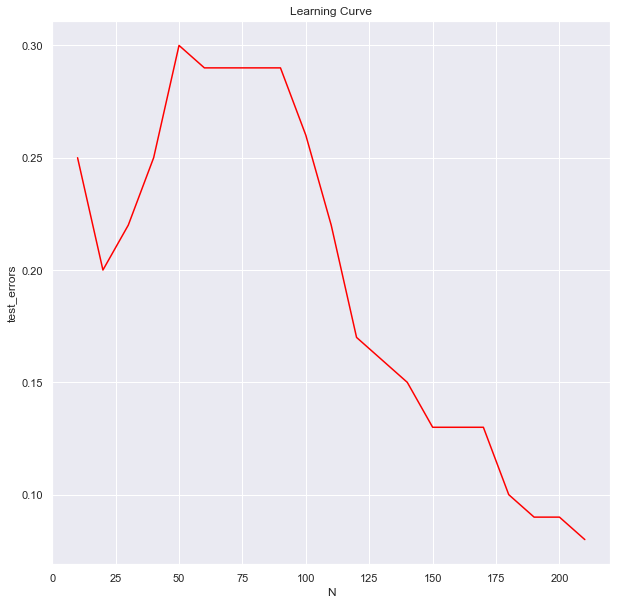

In [11]:
N=[x for x in range(10,220,10)]
Best_error_rate=[]
x1=df1[df1['class']==0]
y1=df1[df1['class']==1]
x_test=pd.concat([x_test,y_test])
for i in N:
    x_train= x1.iloc[:(i//3)]
    y_train= y1.iloc[:(i-(i//3))]

    x_train=pd.concat([x_train,y_train])
   
    
    #Splitting into training and testing data fro that particular value of N
    Y_train=x_train.iloc[:,[-1]] # training labels
    X_train= x_train.drop(columns=['class']) #training features
   
    
    k=[]
    for z in range(1,i,5):
        k.append(z)
    test_error=[]
    for b in k:
        classifier.n_neighbors=b
        classifier.fit(X_train,Y_train)
        test_acc=1-classifier.score(X_test,Y_test)
        test_error.append(test_acc)
        
    minimum=min(test_error)
    Best_error_rate.append(minimum)

plt.plot(N,Best_error_rate,color='red')
plt.xlabel("N")
plt.ylabel("test_errors")
plt.title("Learning Curve")
    

### Question 1.d.i(A) Manhatten Distance

In [12]:
k=[x for x in range(1,200,5)]

manhaten_err=[]
for i in k:
    classifier_manhaten= KNeighborsClassifier(n_neighbors=i,p=1,weights='uniform')
    classifier_manhaten.fit(X_train,Y_train)
    manhaten_error=1-classifier_manhaten.score(X_test,Y_test)
    manhaten_err.append(manhaten_error)
min_manhaten_error=min(manhaten_err)
# print(min_manhaten_error)  
indices_manhaten_err=[]
for i in range(len(manhaten_err)):
    if manhaten_err[i]==min_manhaten_error:
        indices_manhaten_err.append(k[i])
best_k_manhaten=indices_manhaten_err[1]
print("The optimum k value for Manhatten Distance is:",best_k_manhaten)

The optimum k value for Manhatten Distance is: 6


### Question 1.d.i.(B) log10(P)

In [13]:
z=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
p=[]
log10_err=[]
for i in z:
    p.append(pow(10,i))
for b in p:
    classifier_log10= KNeighborsClassifier(n_neighbors=6,p=b,weights='uniform')
    classifier_log10.fit(X_train,Y_train)
    
    log10_error=1-classifier_log10.score(X_test,Y_test)
    log10_err.append(log10_error)
    
min_log10_error=min(log10_err)
index_log10_error=log10_err.index(min_log10_error)
# print(index_log10_error)
P_index_log10=z[index_log10_error]
print("The optimum k-value for Minkowski Log\u2081\u2080(p) is",P_index_log10)
    

The optimum k-value for Minkowski Log₁₀(p) is 0.6


### Question 1.d.i.(C) Chebyshev distance

In [14]:
k=[x for x in range(1,200,5)]

chebyshev_err=[]
for i in k:
    classifier_chebyshev= KNeighborsClassifier(n_neighbors=i,p=np.inf,weights='uniform')
    classifier_chebyshev.fit(X_train,Y_train)
    chebyshev_error=1-classifier_chebyshev.score(X_test,Y_test)
    chebyshev_err.append(chebyshev_error)
    
min_chebsyhev_error=min(chebyshev_err)
index_chebyshev_error=chebyshev_err.index(min_chebsyhev_error)
K_optimum_chebyshev=k[index_chebyshev_error]
print('The optimum K-value for Chebyshev Distance is:',K_optimum_chebyshev)

The optimum K-value for Chebyshev Distance is: 16



### Question 1.d.ii Mahalanobis Distance

In [15]:
k_mahalanobis=[]
error_mahalanobis=[]
z=[x for x in range(1,197,5)]
for k in z:
    mahalanobis = KNeighborsClassifier(n_neighbors=k,metric='mahalanobis',metric_params={'VI': np.linalg.pinv(np.cov(X_train,rowvar=False))})
    mahalanobis.fit(X_train,Y_train)
    mahalanobis_accuracy=mahalanobis.score(X_test,Y_test)
    if not k > 1 :
        continue
    k_mahalanobis.append(k)
    error_mahalanobis.append(1-mahalanobis_accuracy)


k_mahalanobis=k_mahalanobis[error_mahalanobis.index(min(error_mahalanobis))]
print("The optimum k-value for Mahalanobis distance is:",k_mahalanobis)
error_mahalanobis_minimum=min(error_mahalanobis)
print("The minimum error for Mahalanobis Distance is:",error_mahalanobis_minimum)

The optimum k-value for Mahalanobis distance is: 6
The minimum error for Mahalanobis Distance is: 0.16000000000000003


### Question 1.e inversely proportional (Distance)



#### manhatten(distance)

In [16]:
k=[x for x in range(1,200,5)]

manhaten_err=[]
for i in k:
    classifier_manhaten= KNeighborsClassifier(n_neighbors=i,p=1,weights='distance')
    classifier_manhaten.fit(X_train,Y_train)
    manhaten_error=1-classifier_manhaten.score(X_test,Y_test)
    manhaten_err.append(manhaten_error)
min_manhaten_error=min(manhaten_err)

print("The minimum value of error is for Manhatten Distance is :",min_manhaten_error) 


The minimum value of error is for Manhatten Distance is : 0.09999999999999998


#### log10P(distance)

In [17]:
z=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
p=[]
log10_err_distance=[]
for i in z:
    p.append(pow(10,i))
for b in p:
    classifier_log10= KNeighborsClassifier(n_neighbors=6,p=b,weights='distance')
    classifier_log10.fit(X_train,Y_train)
    log10_error_distance=1-classifier_log10.score(X_test,Y_test)
    log10_err_distance.append(log10_error_distance)
min_log10_error_distance=min(log10_err_distance)
print("The minimum value of error for log10(p):",min_log10_error_distance)


The minimum value of error for log10(p): 0.09999999999999998


#### Chebyshev (distance)

In [18]:


k=[x for x in range(1,200,5)]

chebyshev_err_distance=[]
for i in k:
    classifier_chebyshev= KNeighborsClassifier(n_neighbors=i,p=np.inf,weights='distance')
    classifier_chebyshev.fit(X_train,Y_train)
    chebyshev_error_distance=1-classifier_chebyshev.score(X_test,Y_test)
    chebyshev_err_distance.append(chebyshev_error_distance)
    
min_chebsyhev_error_distance=min(chebyshev_err_distance)
print("The value of error for Chebyshev Distance is:",min_chebsyhev_error_distance)
 

The value of error for Chebyshev Distance is: 0.10999999999999999


In [23]:
error_table_data=[["Euclidean Distance",min_val],["Manhatten Distance",min_manhaten_error],["Minkowski log\u2081\u2080(p)",min_log10_error],["Chebyshev Distance",min_chebsyhev_error],["Mahalanobis Distance",error_mahalanobis_minimum]]

In [24]:
error_table=pd.DataFrame(error_table_data,columns=["Distance parameter","Minimum Errors"])
error_table

,Distance parameter,Minimum Errors
0,Euclidean Distance,0.08
1,Manhatten Distance,0.10
2,Minkowski log₁₀(p),0.06
3,Chebyshev Distance,0.08
4,Mahalanobis Distance,0.16


### Question 1.e

In [21]:
print("The minimum training error value:",min(train_error))

The minimum training error value: 0.0


### References

i) https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics/34650347#34650347

ii) https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

iii) https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

iv) https://stackoverflow.com/questions/27264426/arff-files-with-scikit-learn

v)https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html
